In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install easyocr
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.8 MB/s eta 0:00:00


In [ ]:

import easyocr
import cv2
import matplotlib.pyplot as plt


###############OCR EXTRACTION OF TEXT AND RESULT FUNCTION##########
def ocr_extraction(IMAGE_PATH):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(IMAGE_PATH,paragraph="False")
    text=''
    for res in result:
        text+=res[1]+''
    return text,result    #return all text and the result of each #text detected from image

In [ ]:
############# OCR CONTOURS DETECTION FUNCTION ###########
def draw_contours(image_path):
    img = cv2.imread(image_path)
    for detection in result:
        top_left = tuple(detection[0][0])
        bottom_right = tuple(detection[0][2])
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(img)
    plt.show()


In [ ]:
import os
def files_path(dir_path):
    result_files = []
    for root, dirs, files in os.walk(dir_path):
        if files:
            for file in files:
                # Construct the full file path
                file_path = os.path.join(root, file)
                result_files.append(file_path)
    return result_files



In [ ]:
source_folder_path = '/content/drive/MyDrive/scrape-drugs2'
result_files= files_path(source_folder_path)
print(result_files)
print(len(result_files))

['/content/drive/MyDrive/scrape-drugs2/A Ret 0.025% Gel 20gm/A Ret 0.025% Gel 20gm_image_1.jpg', '/content/drive/MyDrive/scrape-drugs2/A Ret 0.1% Gel 20gm/A Ret 0.1% Gel 20gm_image_6.jpg', '/content/drive/MyDrive/scrape-drugs2/A Ret 0.1% Gel 20gm/A Ret 0.1% Gel 20gm_image_8.jpg', '/content/drive/MyDrive/scrape-drugs2/A Ret 0.1% Gel 20gm/A Ret 0.1% Gel 20gm_image_9.jpg', '/content/drive/MyDrive/scrape-drugs2/A Ret 0.1% Gel 20gm/A Ret 0.1% Gel 20gm_image_10.jpg', '/content/drive/MyDrive/scrape-drugs2/AB NEXT Gel 20gm/AB NEXT Gel 20gm_image_3.jpg', "/content/drive/MyDrive/scrape-drugs2/ACCUFINE 10mg Capsule 10's/ACCUFINE 10mg Capsule 10's_image_1.jpg", '/content/drive/MyDrive/scrape-drugs2/ACTEEN Face Wash 70gm/ACTEEN Face Wash 70gm_image_2.jpg', '/content/drive/MyDrive/scrape-drugs2/ACTEEN Face Wash 25gm/ACTEEN Face Wash 25gm_image_2.jpg', '/content/drive/MyDrive/scrape-drugs2/ACROLYN Gel 20gm/ACROLYN Gel 20gm_image_7.jpg', '/content/drive/MyDrive/scrape-drugs2/A Ret 0.05% Gel 20gm/A Ret

text --> Tretinoin Gel USP A-Ret  Gel 0.05% 020e ARMNI20 8


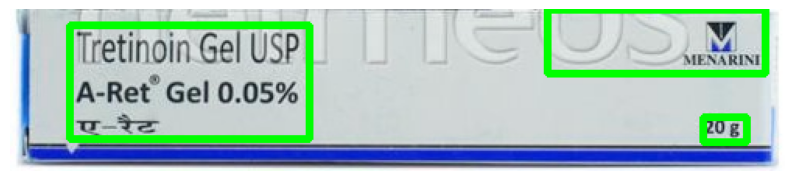

In [ ]:

text,result=ocr_extraction('/content/A Ret 0.05% Gel 20gm_image_2.jpg')
print('text -->',text)
draw_contours('/content/A Ret 0.05% Gel 20gm_image_2.jpg')

In [ ]:
!pip install spacy
import json
import spacy
from spacy.tokens import DocBin
from spacy.util import filter_spans
from tqdm import tqdm

In [ ]:

from spacy.training.example import Example


# Function to create and save training data in spaCy format
def create_train_spacy(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    training_data = {"classes": ["DRUGNAME", "TYPE", "COMPOSITION", "SIZE", "DOSAGE"], "annotations": []}
    for example in data['annotations']:
       if example is not None:
        text, annotations = example

        temp_dict = {}
        temp_dict['text'] = text
        temp_dict['entities'] = []
        for annotation in annotations['entities']:
            start, end, label = annotation

            temp_dict['entities'].append((start, end, label))
        training_data['annotations'].append(temp_dict)

    nlp = spacy.blank("en") # load a new spacy model
    doc_bin = DocBin()
    for training_example  in tqdm(training_data['annotations']):
        text = training_example['text']
        labels = training_example['entities']
        doc = nlp.make_doc(text)
        ents = []
        for start, end, label in labels:
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        filtered_ents = filter_spans(ents)
        doc.ents = filtered_ents
        doc_bin.add(doc)
        doc_bin.to_disk("./training_data.spacy") # save the docbin object
    return training_data



In [ ]:
training_data=create_train_spacy('/content/annotations.json')

100%|██████████| 98/98 [00:00<00:00, 267.40it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


In [ ]:
!python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

2023-08-20 11:42:02.568685: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

2023-08-20 11:42:16.671134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     59.73    6.86    4.48   14.60    0.07
  9     200        171.05   3695.23   93.02   93.13   92.92    0.93
 20     400        200.63    616.44   96.89   97.32   96.46    0.97
 33     600        205.51    396.25   98.67   98.67   98.67    0.99
 49     800        193.86    261.97   99.12   99.12   99.12    0.99
 69    1000        121.17    153.04   99.23   99.12   99.34    0.99
 95    1200        164.87    208.26   99.22   99

In [ ]:
import random
from spacy import displacy
######COLOR GENERATOR FUNCTION ######
def color_gen(): #this function generates and returns a random color.
    random_number = random.randint(0,16777215) #16777215 ~= 256x256x256(R,G,B)
    hex_number = format(random_number, 'x')
    hex_number = '#' + hex_number
    return hex_number #generate color randomly
#####DISPLAY DOCUMENT FUNCTION########
def display_doc(doc):
    colors = { ent.label_:color_gen() for ent in doc.ents
             }
    options = {"ents": [ ent.label_ for ent in doc.ents],
                "colors": colors
              }
    displacy.render(doc, style='ent', options=options, jupyter=True)#display of entities recognition in text

nlp_ner = spacy.load("model-best")
doc=nlp_ner(text)
display_doc(doc)

In [ ]:
!pip install fpdf
from fpdf import FPDF


#DETAILS EXTRACTION FUNCTION OF DOCUMENT(LABEL->ENTITIES) #
def details_dict(doc):
    Details = {}
    for ent in doc.ents:
    #     print(ent.ents,ent.label_)
        if(ent.label_ not in Details):
            Details[ent.label_]=[str(ent.ents[0])]
        else:
            if(str(ent.ents[0]).strip() not  in Details[ent.label_] ):
                Details[ent.label_].append(str(ent.ents[0]))
    return Details #return detail label+all his entities


#TEXT FILE FUNCTION TO SAVE DETAILS #
def create_file_txt(dict_variable):
    text_file = open("details.txt", "w")
    Details=dict_variable

    for dic in Details:
        txt=dic.upper() +' : '
        for i in range(len(Details[dic])):
            if(i<len(Details[dic])-1):
                txt+=Details[dic][i]+' , '
            else:
                txt+=Details[dic][i]
        txt+='\n'
        text_file.write(txt)#close file
    text_file.close()


#PDF SUMMARY OF THE MEDICAL REPORT FUNCTION #
def create_summary_pdf(file_txt_path):
    # save FPDF() class into a
    # variable pdf
    pdf = FPDF()
    # Add a page
    pdf.add_page()# set style and size of font
    # that you want in the pdf
    pdf.set_font("Arial", size = 15)# create a cell
    pdf.cell(200, 10, txt = "HEALTHCARE", ln = 1, align = 'C')# add another cell
    pdf.cell(200, 10, txt = "A CLINICAL REPORT SUMMARY",ln=1 , align = 'C')
    f = open(file_txt_path, "r")
    pdf.set_font("Arial", size = 10)
    for x in f:
       pdf.multi_cell(0, 5, txt = '\n'+x)
    f.close()
    # save the pdf with name .pdf
    pdf.output("SUMMARY.pdf")
details=details_dict(doc)
create_file_txt(details)
create_summary_pdf("details.txt")

In [ ]:
import os
import pandas as pd

# Load the Excel file
excel_filename = "/content/ocr_results_correct.xlsx"
df = pd.read_excel(excel_filename)


source_folder_path = '/content/drive/MyDrive/scrape-drugs2'
result_files= files_path(source_folder_path)
print(result_files)

nlp_ner = spacy.load("model-best")
d={}
resume=''


for file in  result_files :
    IMAGE_PATH = file
    text,result=ocr_extraction(IMAGE_PATH)

    text1,result=ocr_extraction(IMAGE_PATH)
    # Find the row corresponding to the IMAGE_PATH in the DataFrame
    row = df[df["Image Path"] == IMAGE_PATH]

    if not row.empty:
        # Extract the extracted text from the DataFrame
        text = row["Extracted Text"].iloc[0]
        print('text -->', text)
    draw_contours(IMAGE_PATH)



    resume+=text+'  '
    doc=nlp_ner(text)
    display_doc(doc)
    Details=details_dict(doc)
    for ent in Details:
        if(ent not in d):
            d[ent]=Details[ent]
        else:
            for itm in Details[ent]:
                if itm not in d[ent]:
                    d[ent].append(itm)

create_file_txt(d)
create_summary_pdf("details.txt")

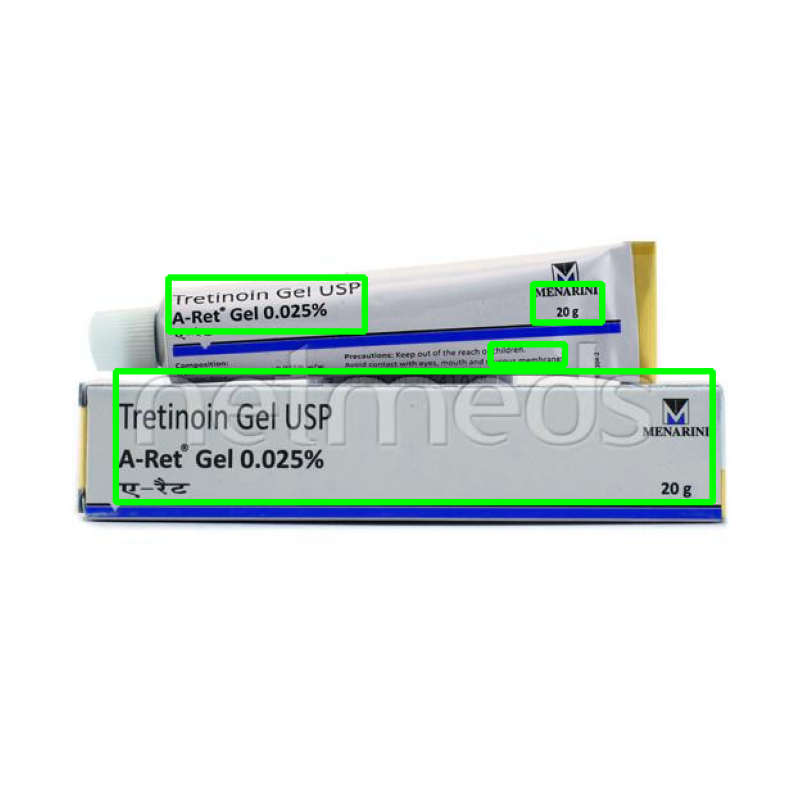

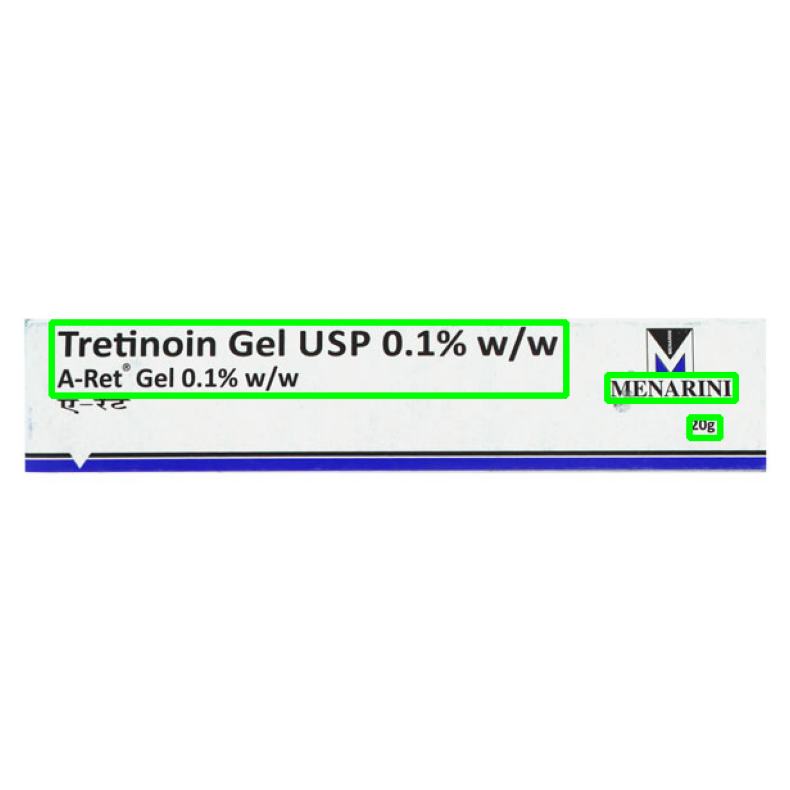

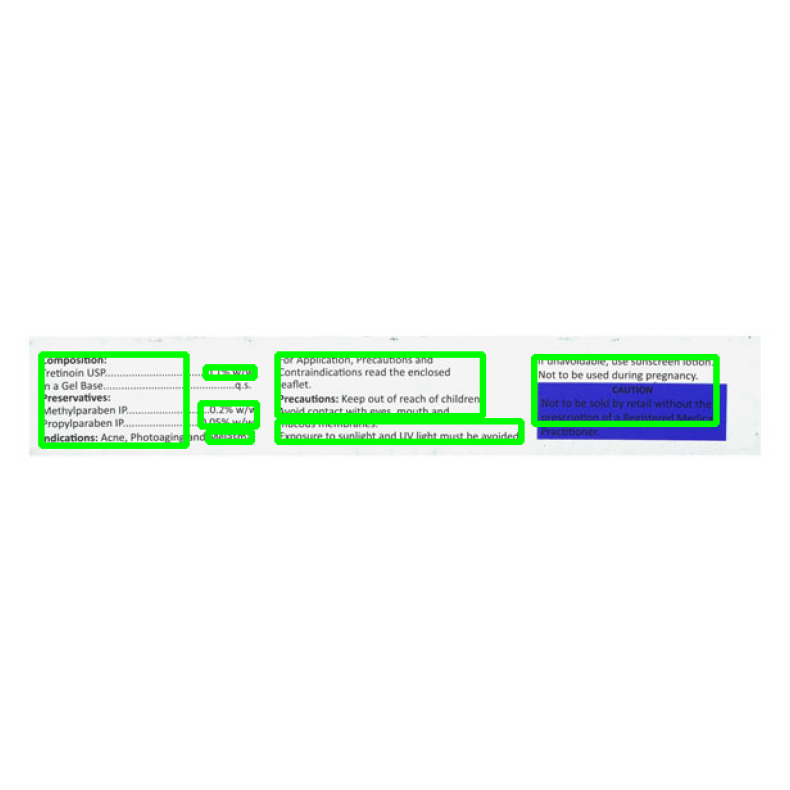

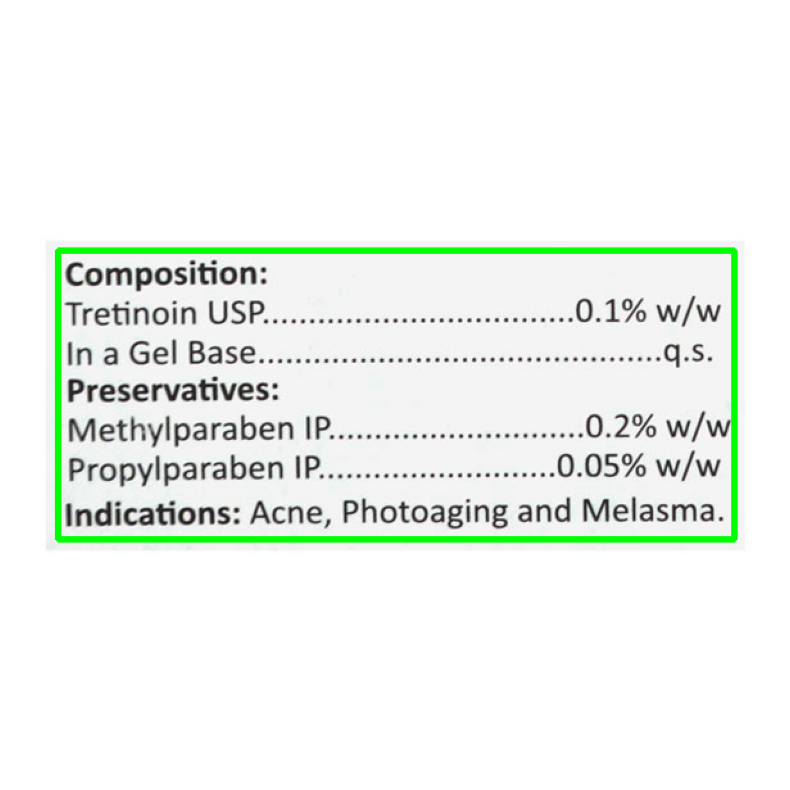

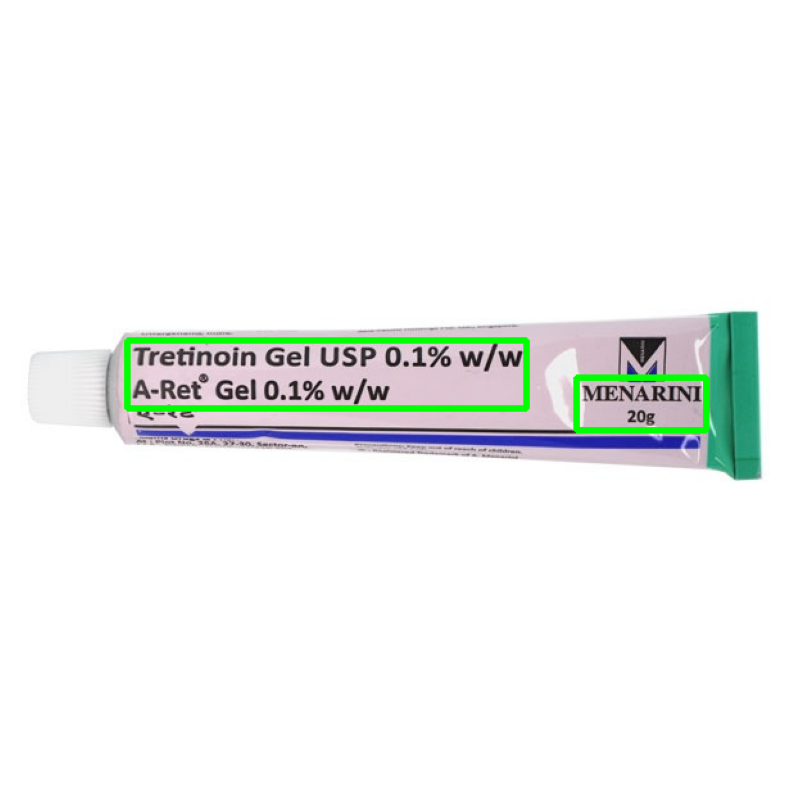

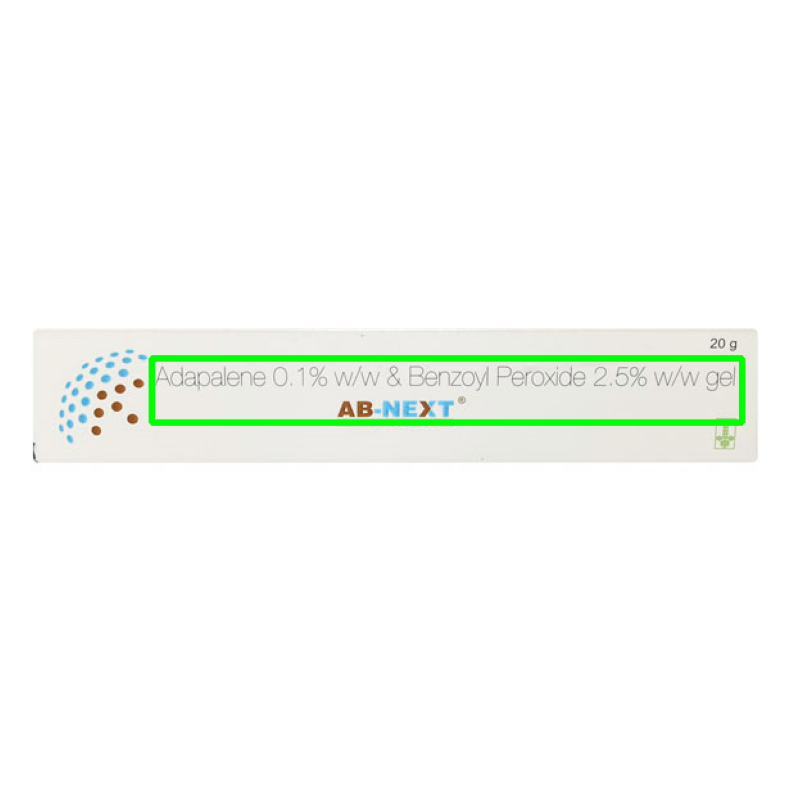

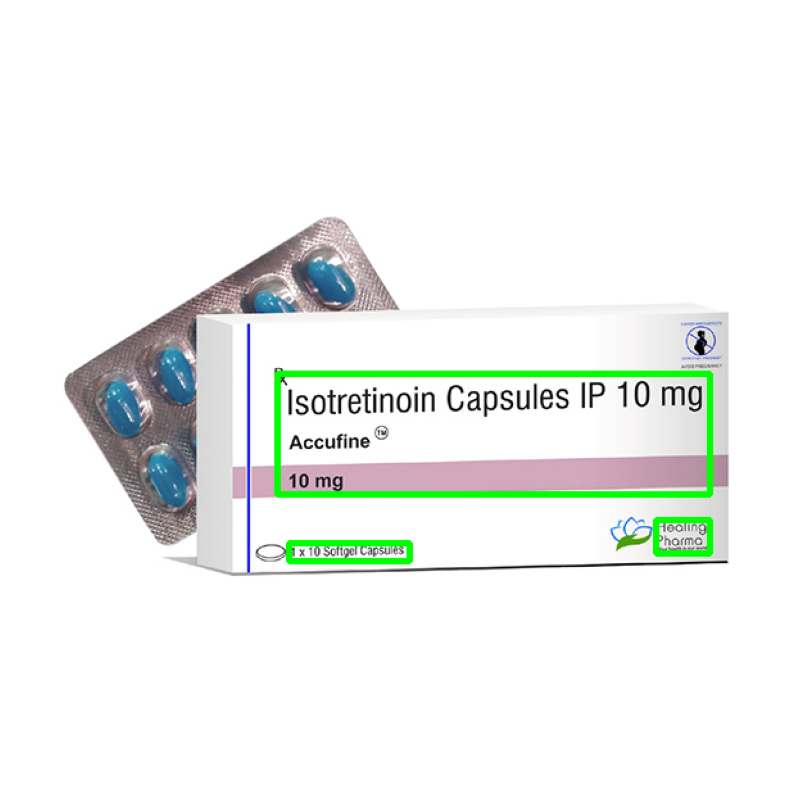

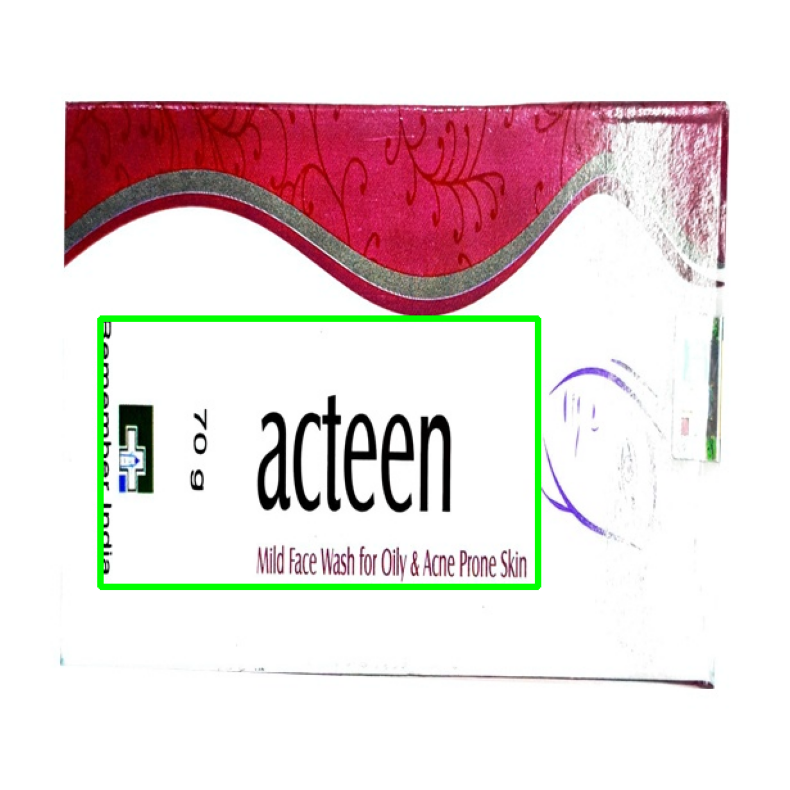

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


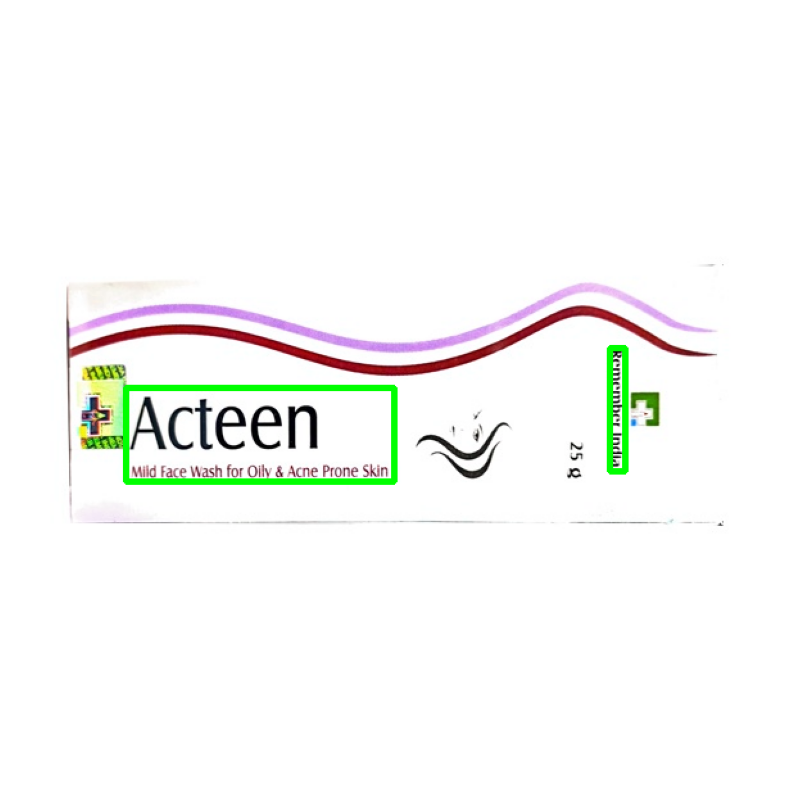

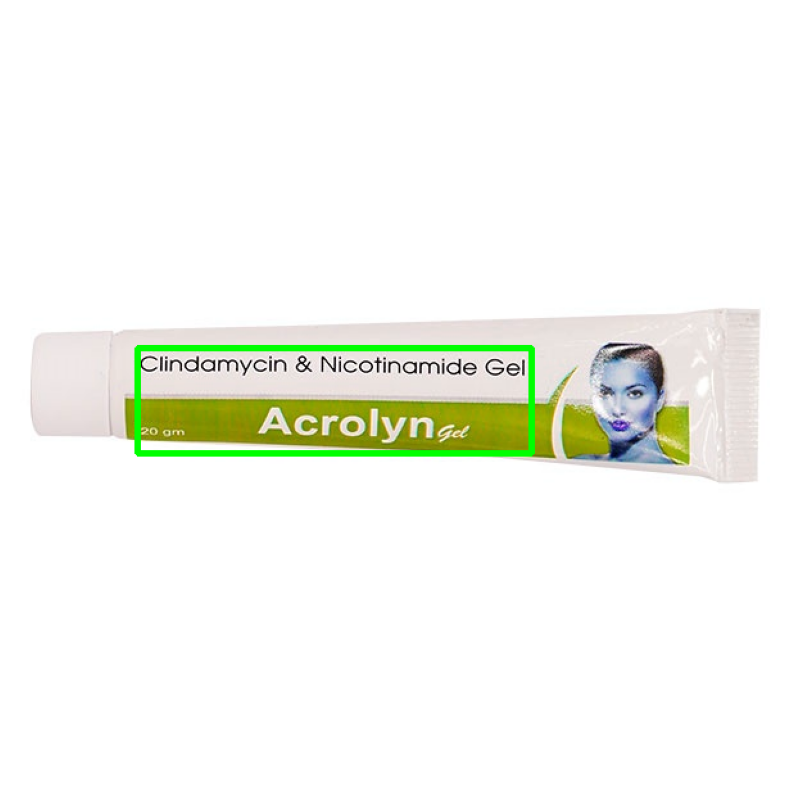

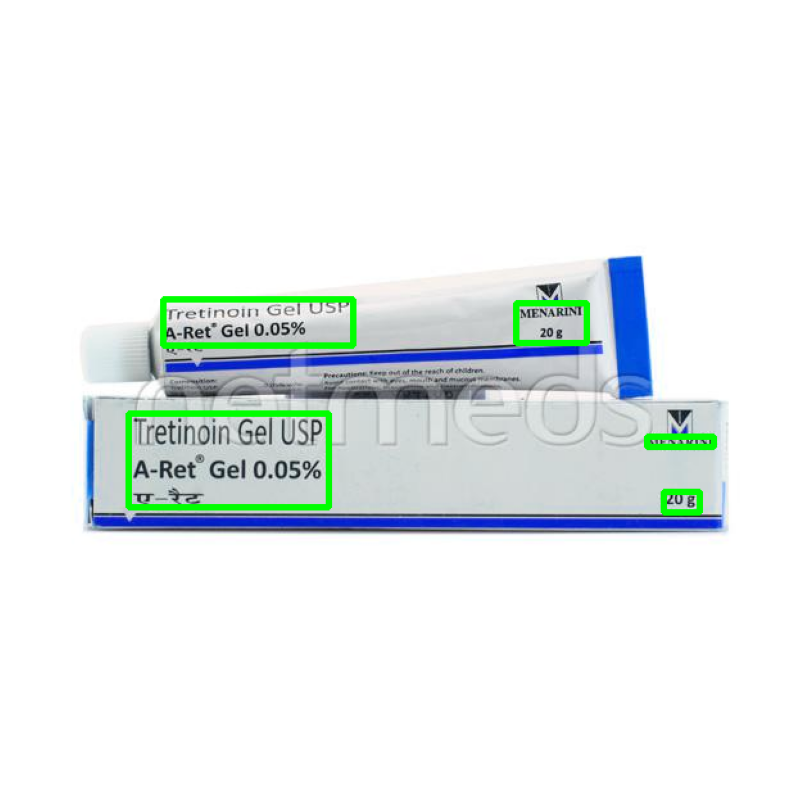

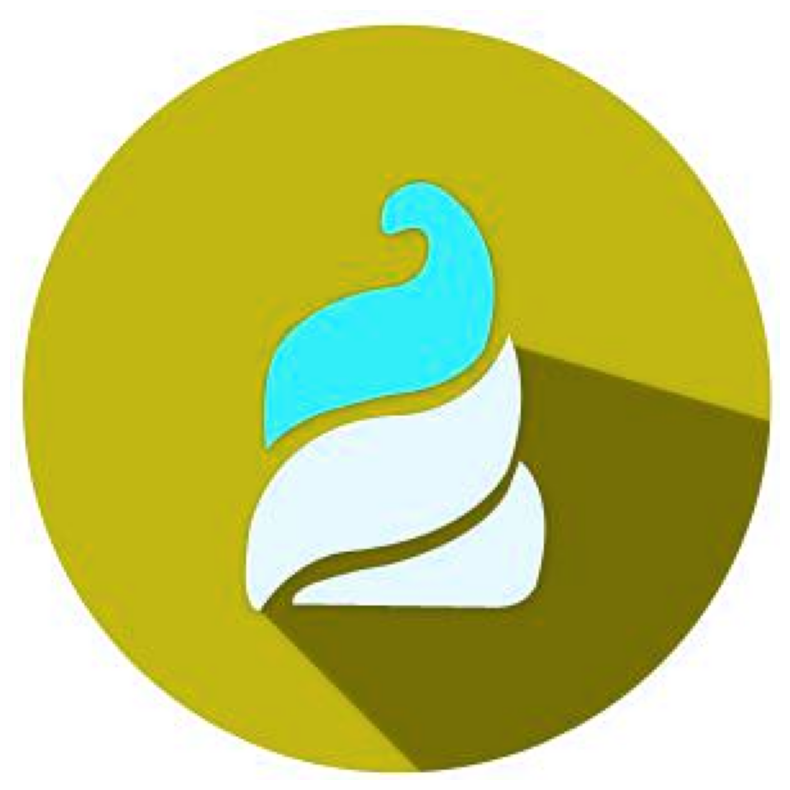

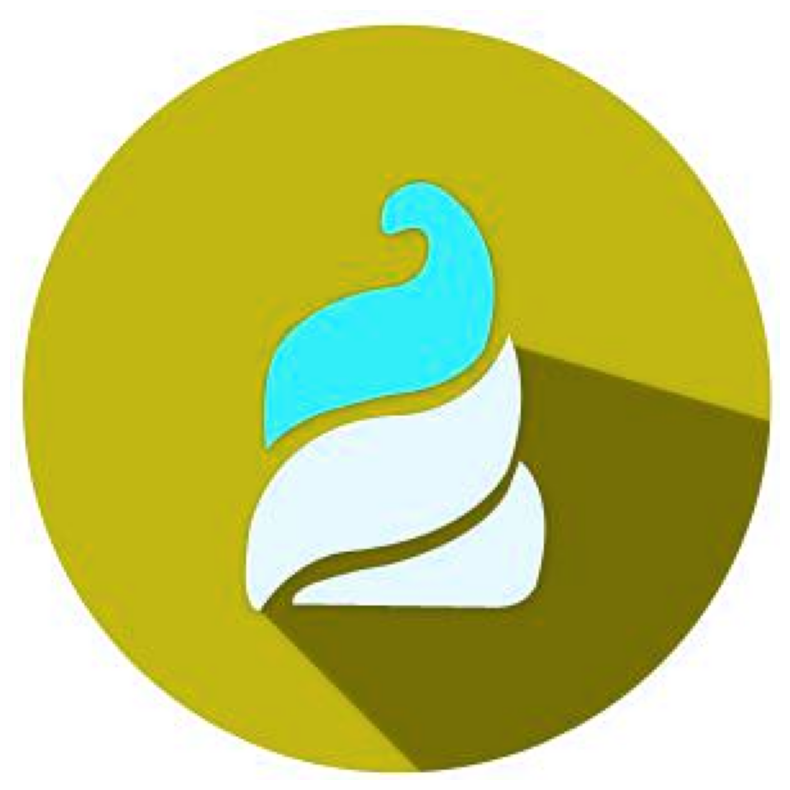

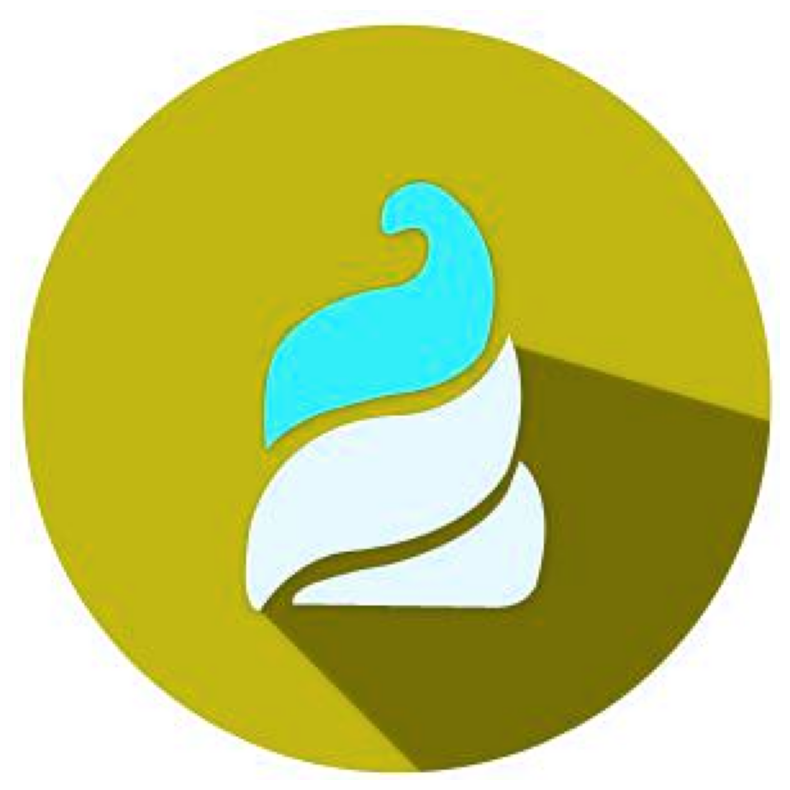

NER data saved to ner_results.xlsx


In [ ]:
import os
import pandas as pd

# Load the Excel file
excel_filename = "/content/ocr_results_correct.xlsx"
df = pd.read_excel(excel_filename)




nlp_ner = spacy.load("model-best")
d={}
resume=''

# Initialize a list to store NER data
ner_data = []

for file in  result_files :
    IMAGE_PATH = file
    text,result=ocr_extraction(IMAGE_PATH)

    text1,result=ocr_extraction(IMAGE_PATH)
    # Find the row corresponding to the IMAGE_PATH in the DataFrame
    row = df[df["Image Path"] == IMAGE_PATH]

    if not row.empty:
        # Extract the extracted text from the DataFrame
        text = row["Extracted Text"].iloc[0]
        print('text -->', text)
    draw_contours(IMAGE_PATH)



    resume+=text+'  '
    doc=nlp_ner(text)
    display_doc(doc)
    Details=details_dict(doc)
    # Create a dictionary for the NER data for the current image
    image_ner = {
        "IMAGE_PATH": IMAGE_PATH,
        "DRUGNAME": ", ".join(Details.get("DRUGNAME", [])),
        "TYPE": ", ".join(Details.get("TYPE", [])),
        "COMPOSITION": ", ".join(Details.get("COMPOSITION", [])),
        "SIZE": ", ".join(Details.get("SIZE", [])),
        "DOSAGE": ", ".join(Details.get("DOSAGE", []))
    }

    ner_data.append(image_ner)

# Create a DataFrame from the NER data list
ner_df = pd.DataFrame(ner_data, columns=["IMAGE_PATH", "DRUGNAME", "TYPE", "COMPOSITION", "SIZE", "DOSAGE"])

# Save the DataFrame to the same Excel file with the specified structure
ner_excel_filename = "ner_results.xlsx"
ner_df.to_excel(ner_excel_filename, index=False)

print("NER data saved to", ner_excel_filename)